# Sample code for exercise 1-2
2017 Aug. Tsuyoshi Okubo  
2018 Dec. Modified  
2020 Nov. Modified and add appendix

In this code, you can simulate SVD(Schmidt decomposition) of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} + D\sum_i S_{i,z}^2$$

You can change   

- N: # of sites
- m: size of spin  (2S = m - 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- D : Single ion anisotropy  
- periodic: Flag for periodic boundary condition  

For example, when you set $m=2$ ($S=1/2$), $J_z = - 1$ and $J_{xy} = 0$ (ferromagnetic Ising interaction), and $h_x \neq 0$ (finite tranverse field), the model coinsides with the transe vers field Ising model.  
Another example is the (spin $S = (m - 1)/2)$  antiferromagnetic Heinseberg model by setting $J_z = J_{xy} = 1$.



The ground state will be calculated by Krylov subspace method. Thus, you treat relatively small system size, e.g. $N < 20$, because the dimension of the state vector is $m^N$.

In the appendix, you can also check the $N$ dependence of the entanglement entropy for the ground states. Note that you may need loger time for this part due to the calculation of the ground states.

In [10]:
import numpy as np
import scipy.linalg as linalg
%matplotlib inline
from matplotlib import pyplot
import ED 

In [11]:
N=16          ## Chain length 
m = 2         ## m = 2S + 1, e.g. m=3 for S=1 
Jz = -1.0      ## Jz for SzSz interaction
Jxy = 0.0     ## Jxy for SxSx + SySy interaction
hx = 0.4      ## external field along x direction
D = 0.0       ## single ion anisotropy
periodic = False ## periodic boundasry condition

In [12]:
print("2S = m - 1, N-site spin chain")
print("N = "+repr(N))
print("m = "+repr(m))
print("Hamiltonian parameters:")
print("Jz = "+repr(Jz))
print("Jxy = "+repr(Jxy))
print("hx = "+repr(hx))
print("D = "+repr(D))
print("periodic = "+repr(periodic))


2S = m - 1, N-site spin chain
N = 16
m = 2
Hamiltonian parameters:
Jz = -1.0
Jxy = 0.0
hx = 0.4
D = 0.0
periodic = False


First, we calculated the ground state of the model. Note that the dimension of the ground vector is $m^N$.

In [13]:
## Obtain the smallest eigenvalue
eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,D,N,k=1,periodic=periodic)
if periodic :
    print("Ground state energy per bond= " +repr(eig_val[0]/N))
else:
    print("Ground state energy per bond= " +repr(eig_val[0]/(N-1)))


Ground state energy per bond= -0.30083127391326936


Then the $m^N$ dimensional vector is transformed into a $m^{N/2} \times m^{N/2}$ matrix. Then we perform the singular value decomposition of it.

In [14]:
## Make matrix from wave function
Mat = eig_vec[:,0].reshape(m**(N//2),m**(N-N//2))

## SVD
s = linalg.svdvals(Mat)

The singular values are normalized as $\sum_i s_i^2 = 1$. As explained in Ex1-1, the squared sum of the singualr values is related to the norm of the vector $$ \lVert \vec{v} \rVert = \sqrt{\mathrm{Tr}~{MM^T}} = \sqrt{\sum_i s_i^2}. $$
In the present case, the ground state vector is already properly normalized. Thus, you will see "norization" is almost equal to $1$.

The entanglement entropy is calculated as 
$$ S = -\sum_i s_i^2 \log s_i^2. $$

In [15]:
## Entanglement entropy
norm = np.sqrt(np.sum(s**2))
print("Norm of the vector = "+ repr(norm))

s /= norm
EE = -np.sum(s**2*np.log(s**2))
print("Entanglement entropy = " + repr(EE))

Norm of the vector = 0.9999999999999998
Entanglement entropy = 0.6742495666762239


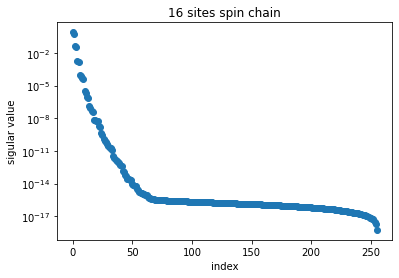

In [16]:
## plot singular values
pyplot.title(repr(N)+" sites spin chain")
pyplot.plot(np.arange(m**(N//2),dtype=int),s,"o")
pyplot.xlabel("index")
pyplot.ylabel("sigular value")
pyplot.yscale("log")
pyplot.show()


## Appendix: Scaling of the entanglement entorpy
In the following section, you can check the scaling of the entanglement entropy for the ground state vectors.  

We use the same parameters for the Hamiltonian, and vary $N$ from N_min to N_max with N_step interval.

In [17]:
N_min = 4
N_max = 16
N_step = 2

N_list = np.arange(N_min,N_max+1,N_step,dtype=int)

Here we calculate the entanglement entropy for each $N$.

In [18]:
EE_list = []
for N in N_list:
    ## get the ground state vector
    eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,D,N,k=1,periodic=periodic)

    ## Make matrix from wave function
    Mat = eig_vec[:].reshape(m**(N//2),m**(N-N//2))

    ## SVD
    s = linalg.svdvals(Mat)
    norm = np.sqrt(np.sum(s**2))

    s /= norm
    EE_list.append(-np.sum(s**2*np.log(s**2)))

Finally, we plot $N$ dependence of the entanglement entorpy. You can see 

- The entanglement entorpy is much smaller than the random vector with the same dimension.
- The entanglement entropy tends to saturate as $N$ is increased, corresponding to the area low in the one dimensional system.

In the case of "gapless" system, such as $S=1/2$ Heinseberg model and the transe verse filed Ising model at the critical point ($h_c=0.5$), you may see weak increase of the entanglement entropy due to $\log N$ correction.

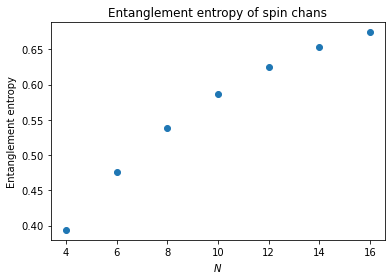

In [19]:
## plot of the entanglement entropy
pyplot.title("Entanglement entropy of spin chans")
pyplot.plot(N_list,EE_list,"o")
pyplot.xlabel("$N$")
pyplot.ylabel("Entanglement entropy")
pyplot.show()